
# Topic: Process Monitoring via DPLS using PDS_DPLS module

#### For illustration, we will use benchmark data from Tennessee Eastman process (TEP). The dataset for this process has been made available at https://github.com/camaramm/tennessee-eastman-profBraatz. 
##### This process consists of several unit operations: a reactor, a condenser, a separator, a stripper, and a recycle compressor. There are 22 continuous process measurements, 19 composition measurements, and 11 manipulated variables.

#### Details on the process and the PLS methodology is available in our book 'Machine Learning in Python for Process Systems Engineering' (https://leanpub.com/machineLearningPSE)

#### The dataset contains training and test data from normal operation period and 21 faulty periods with distinct fault causes. For each fault class, training dataset contains 480 samples collected over 24 operation hours and test dataset contains 960 samples collected over 48 operation hours. For the faulty data, faulty operation starts from sample 160 onwards. Our objective here is to build a fault detection tool that clearly indicates the onset of process fault. 


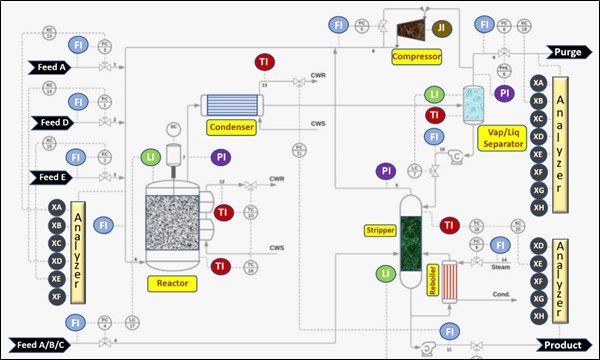

###### The above diagram adapted from the original flowsheet by Gilberto Xavier (https://github.com/gmxavier/TEP-meets-LSTM) provided under Creative-Commons Attribution 4.0 International License (https://creativecommons.org/licenses/by/4.0/).

In [1]:
# import required packages
import numpy as np
from PDStoolkit import PDS_DPLS

In [2]:
# read training and faulty/test data
trainingData = np.loadtxt('d00.dat').T  # Tennessee Eastman dataset
FaultyData =  np.loadtxt('d05_te.dat')

In [3]:
# separate inputs and outputs in datasets
X_train, Y_train = trainingData[:,41:52], trainingData[:,0:22]
X_test, Y_test = FaultyData[:,41:52], FaultyData[:,0:22]

In [4]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          Train the monitoring model
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Performing cross-validation with 1 latents
Performing cross-validation with 2 latents
Performing cross-validation with 3 latents
Performing cross-validation with 4 latents
Performing cross-validation with 5 latents
Performing cross-validation with 6 latents
Performing cross-validation with 7 latents
Performing cross-validation with 8 latents
Performing cross-validation with 9 latents
Performing cross-validation with 10 latents
Performing cross-validation with 11 latents
Performing cross-validation with 12 latents
Performing cross-validation with 13 latents
# of latents selected:  12


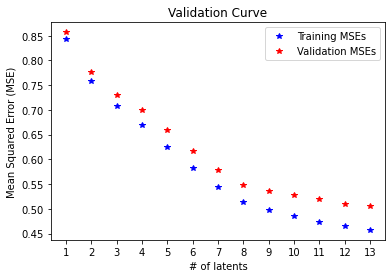

PDS_DPLS(n_lags=2)

In [5]:
# build PDS_DPLS model
dpls = PDS_DPLS(n_lags=2)
dpls.fit(X_train, Y_train, autoFindNLatents=True, ratioThreshold=0.99) #scaling is by default

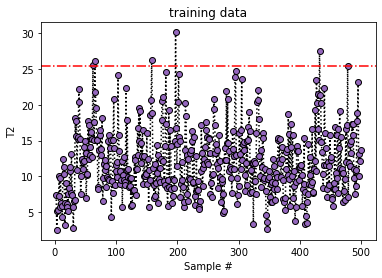

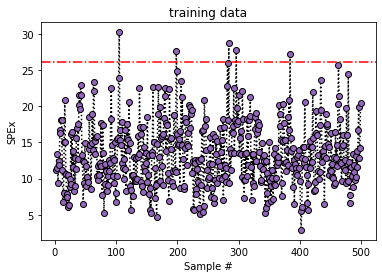

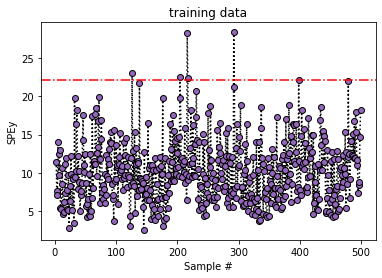

In [6]:
# use methods of the fitted PDS_CVA object to compute monitoring metrics, their thresholds, and plot monitoring charts
metrics_train = dpls.computeMetrics(X_train, Y_train, isTrainingData=True)
T2_CL, SPEx_CL, SPEy_CL = dpls.computeThresholds(method='percentile', percentile=99)
dpls.draw_monitoring_charts(title='training data')

# the above three lines of code could equivalently be replaced with the following
# dpls.fit_4_monitoring(X_train, Y_train, autoFindNLatents=True, ratioThreshold=0.99, method='percentile', percentile=99)

In [7]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                     control charts for test data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

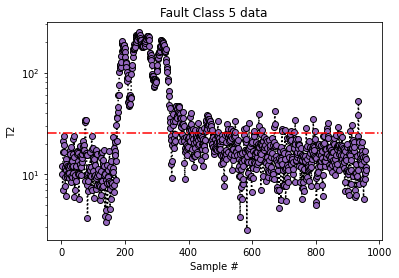

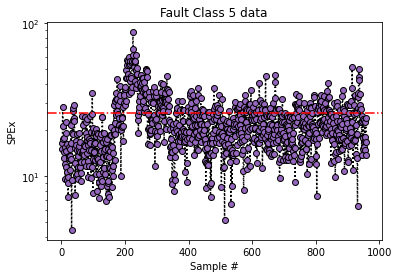

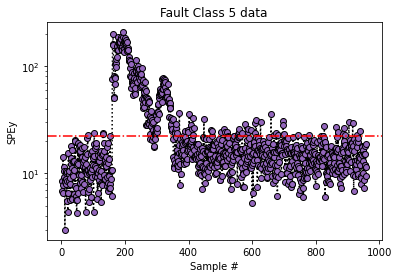

In [8]:
metrics_test = dpls.computeMetrics(X_test, Y_test)
dpls.draw_monitoring_charts(metrics=metrics_test, logScaleY=True, title='Fault Class 5 data')

Number of abnormal sample(s):  467


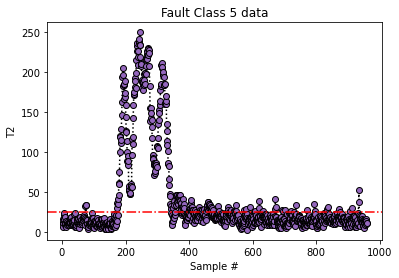

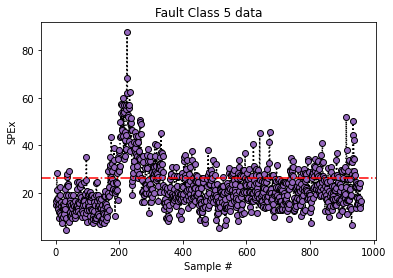

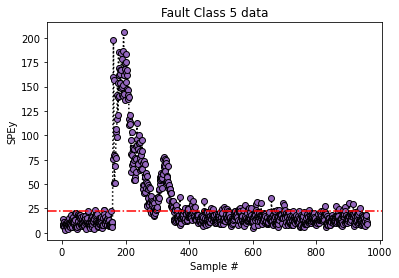

In [9]:
abnormalityFlags = dpls.detect_abnormalities(X_test, Y_test, title='Fault Class 5 data')